<a href="https://colab.research.google.com/github/parasgupta1995/Machine_learning_Project_Bike_sale_Prediction-Regression-/blob/main/airline_passenger_referal_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---


## ***The dataset is scarped in the spring 2019. Data contain within dataset provide information about whether a passenger will refer the airline to his/her friends based on their travel experience during the course of his/her journey with the airline.The features are listed below based on which passenger decide to refer the airline to his/her friends or not;***


---



---




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/DATA for projects/data_airline_reviews.xlsx')

In [ ]:
df.shape

(131895, 17)

In [ ]:
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop row which null value in recommended columns
df.dropna(axis=0,subset=['recommended'],inplace=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
df.shape

(64440, 17)

In [ ]:
# Converting the review date to datetime
def remove(x):
  sub_script=['st','nd','rd','th']

  for i in sub_script:
    x=x.replace(i,'')
  y=x.split(' ')
  y[1]=y[1][0:3]
  x=' '.join(y)
  return x
df['review_date']=pd.to_datetime(df['review_date'].apply(lambda x: remove(str(x))))
df['date_flown']=pd.to_datetime(df['date_flown'])

In [ ]:
# Number of stop during the journey, if the df['route']==NaN then assumption is made that flight directly reaches the destination

def stop(x):
  '''Function to count the number of stop during the journey'''
  x=str(x).split(' ')
  count=0
  for i in x:
    i=i.lower()
    if i=='via':
      count+=1
  return count

df['stops']=df['route'].apply(lambda x: stop(x)) 


In [ ]:
#Total passenger travel through the airline and there recommendation count whether a passenger refer the airline or not.

pass_rec=df[['airline','recommended','author']].groupby(by=['airline','recommended']).agg('count').reset_index()
pass_rec=pass_rec.pivot(index="airline",columns="recommended")
pass_rec.columns=['no','yes']
pass_rec['total passenger']=pass_rec.agg('sum',axis=1)
pass_rec=pass_rec.sort_values(by='total passenger').reset_index()
pass_rec

,airline,no,yes,total passenger
0,Thai Smile Airways,17,30,47
1,Tunisair,45,26,71
2,Air Arabia,58,22,80
3,Adria Airways,41,42,83
4,QantasLink,22,81,103
...,...,...,...,...
76,Cathay Pacific Airways,720,1632,2352
77,British Airways,1546,1177,2723
78,United Airlines,2177,593,2770
79,American Airlines,2216,560,2776


In [ ]:
# Extracting the null value percentage for each columns

col=list(df.columns)
null_=[]

for i in col:
  count_null=df[df[i].isnull()==True][i].shape[0]
  total=df[i].shape[0]
  percent=round(count_null/total*100,2)
  null_.append(percent)
null_dict=dict(zip(col,null_))


In [ ]:
# Imputing the NaN with mode for categorical data if percentage of NaN is less than 10%

print("The features which has NaN values less than 10% are follows:")
for i,col in enumerate(null_dict):
  if 0<null_dict.get(col)<10:
    np.where(df[col].isnull(),df[col].mode(),df[col])
    print('\n*',col)
  else:
    pass


The features which has NaN values less than 10% are follows:

* overall

* cabin

* seat_comfort

* cabin_service

* value_for_money


### 1. Eplainatory Data Analysis

In [ ]:
# Referal percentage for each airline by passenger

pass_rec['referal_percent']=pass_rec['yes'].div(pass_rec['total passenger'])*100
pass_rec.sort_values(by='referal_percent',inplace=True)
pass_rec

,airline,no,yes,total passenger,referal_percent
72,Frontier Airlines,1375,222,1597,13.901064
80,Spirit Airlines,2356,514,2870,17.909408
75,Air Canada rouge,1768,394,2162,18.223867
79,American Airlines,2216,560,2776,20.172911
78,United Airlines,2177,593,2770,21.407942
...,...,...,...,...,...
30,ANA All Nippon Airways,76,385,461,83.514100
29,Asiana Airlines,66,369,435,84.827586
35,EVA Air,74,438,512,85.546875
73,China Southern Airlines,233,1456,1689,86.204855


Text(0, 0.5, 'Referal Percent')

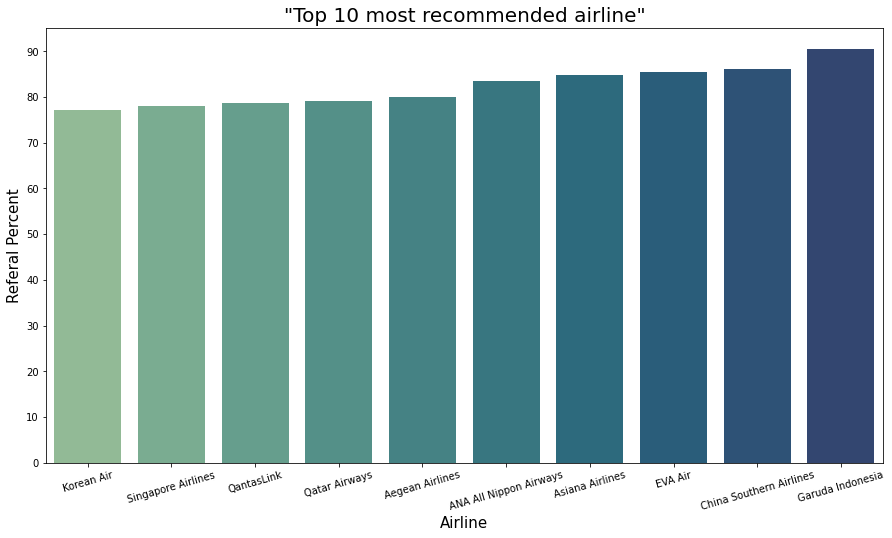

In [ ]:
# Top 10 most recommended airline
top_10=pass_rec[['airline','referal_percent']].tail(10)

plt.figure(figsize=(15,8))
sns.barplot(x=top_10.airline,y=top_10.referal_percent,palette='crest')
plt.title('"Top 10 most recommended airline"',fontsize=20)
plt.xticks(rotation=16)
plt.yticks(np.arange(0,100,step=10))
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Referal Percent', fontsize=15)


Text(0, 0.5, 'Referal Percent')

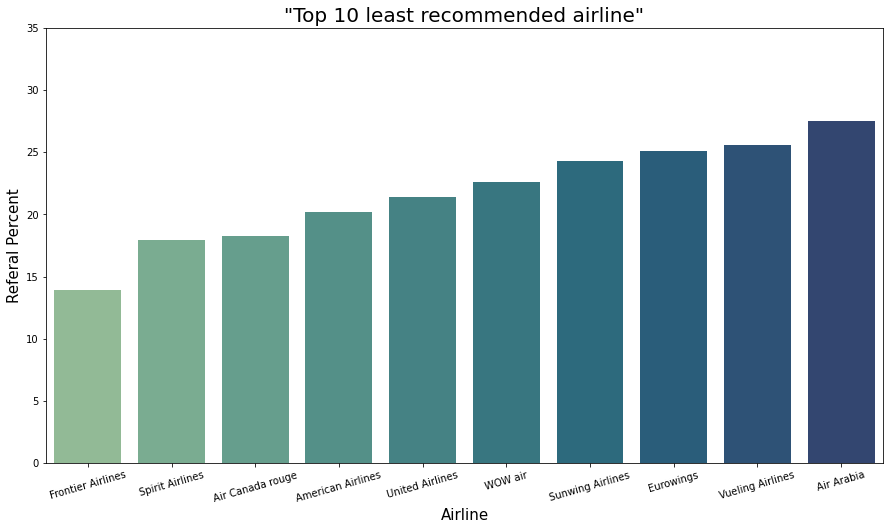

In [ ]:
# Top 10 least recommended airline
top_10=pass_rec[['airline','referal_percent']].head(10)

plt.figure(figsize=(15,8))
sns.barplot(x=top_10.airline,y=top_10.referal_percent,palette='crest')
plt.title('"Top 10 least recommended airline"',fontsize=20)
plt.xticks(rotation=16)
plt.yticks(np.arange(0,40,step=5))
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Referal Percent', fontsize=15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


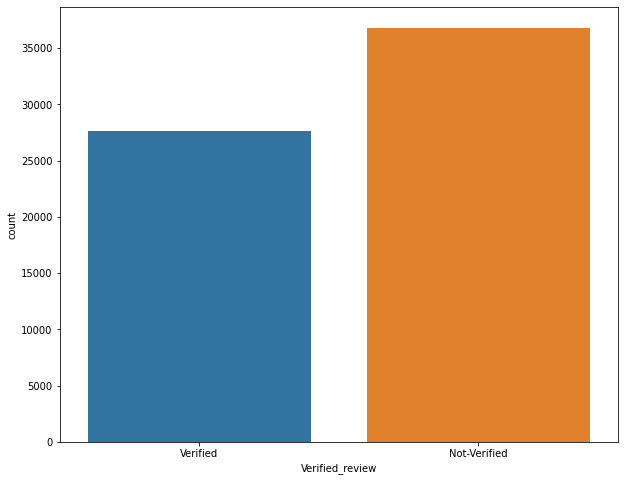

In [ ]:
# Verified Reviews

def verified(x):
  '''Function to count the number of stop during the journey'''
  x=str(x).split('.')
  x=str(x).split(' ')
  i='Verified'
  if i in x:
    x='Verified'
  else:
    x='Not-Verified'
  return x

df['Verified_review']=df['customer_review'].apply(lambda x: verified(x))

plt.figure(figsize=(10,8))
sns.countplot(df['Verified_review'])

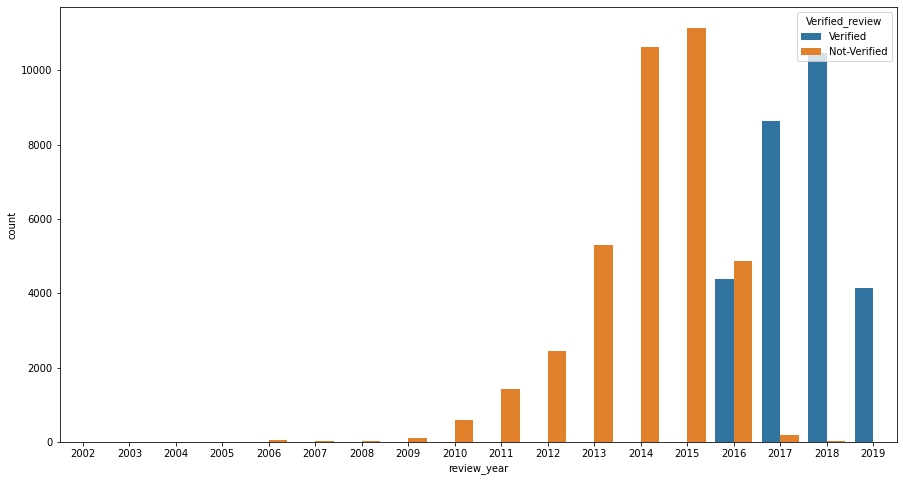

In [ ]:
# Number of verified review plot
df['review_year']=df['review_date'].apply(lambda x: x.year)
plt.figure(figsize=(15,8))
g=sns.countplot(data=df,x='review_year',hue='Verified_review')


Text(0, 0.5, 'Count')

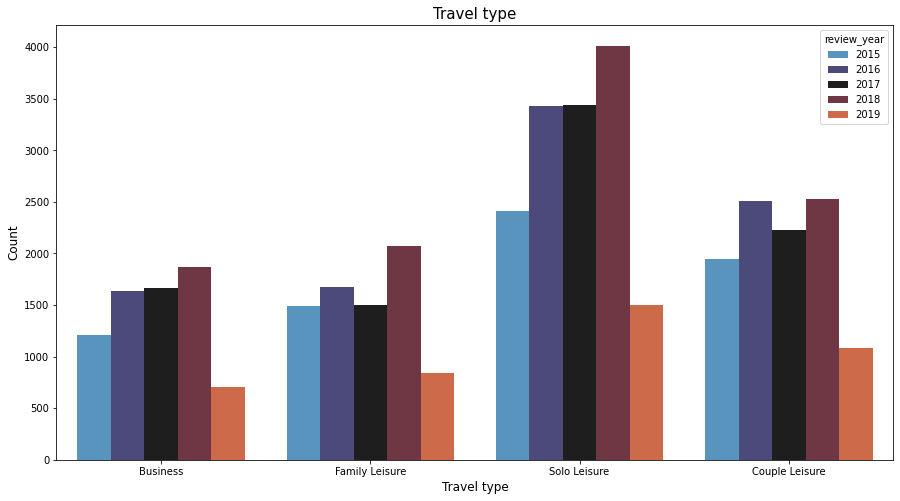

In [ ]:
# Traveller type plot
plt.figure(figsize=(15,8))
g=sns.countplot(data=df[df['traveller_type'].isna()==False],x='traveller_type',hue='review_year',palette='icefire')
g.set_title('Travel type',fontsize=15)
g.set_xlabel("Travel type",fontsize=12)
g.set_ylabel("Count",fontsize=12)

Text(0, 0.5, 'Count')

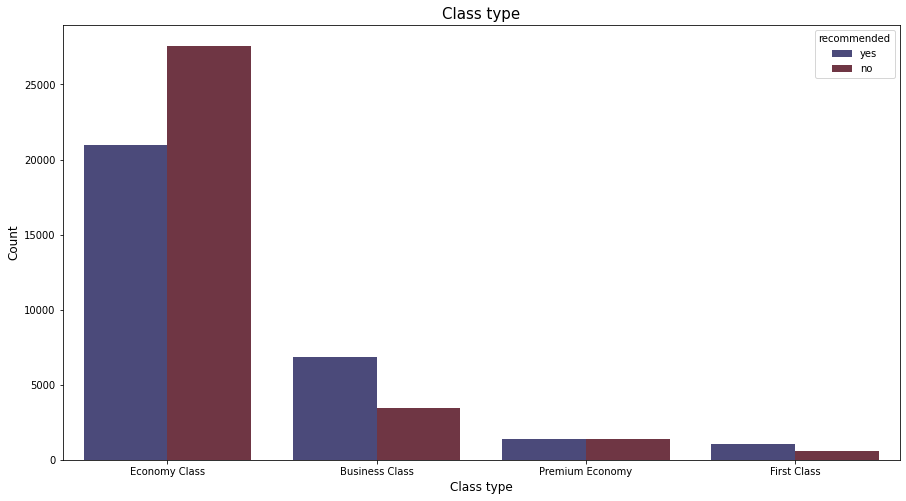

In [ ]:
# Class type visualization
plt.figure(figsize=(15,8))
g=sns.countplot(data=df[df['cabin'].isna()==False],x='cabin',hue='recommended',palette='icefire')
g.set_title('Class type',fontsize=15)
g.set_xlabel("Class type",fontsize=12)
g.set_ylabel("Count",fontsize=12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

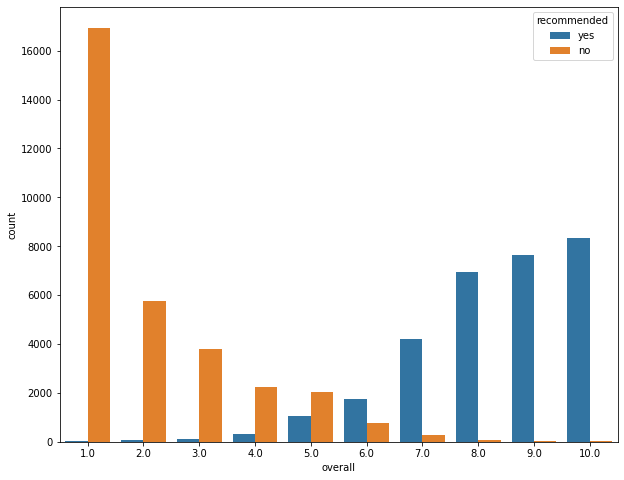

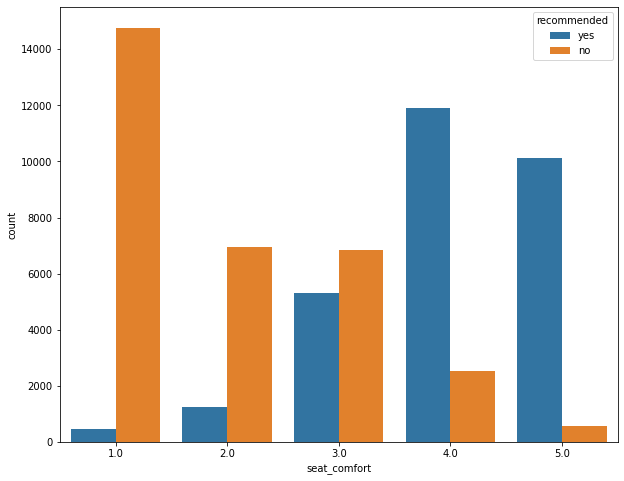

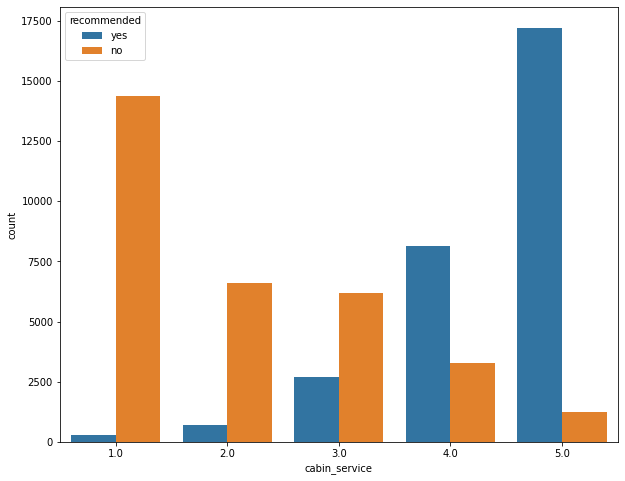

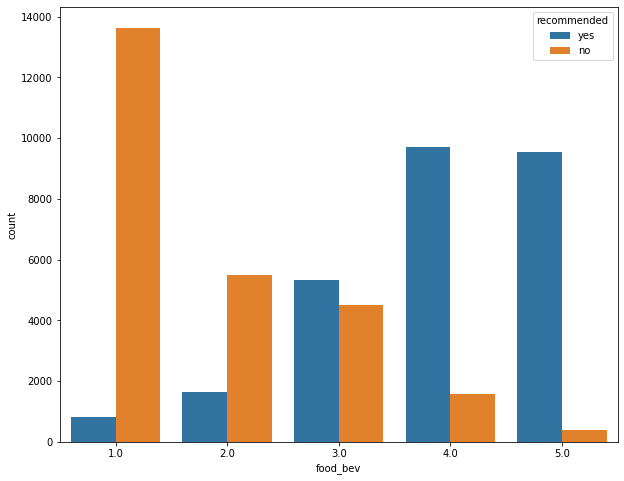

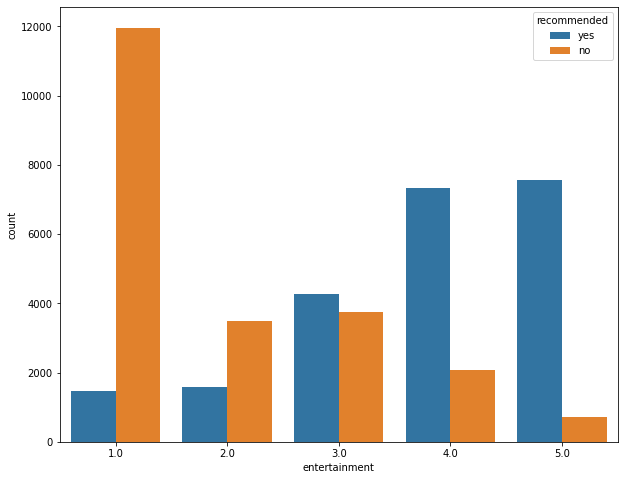

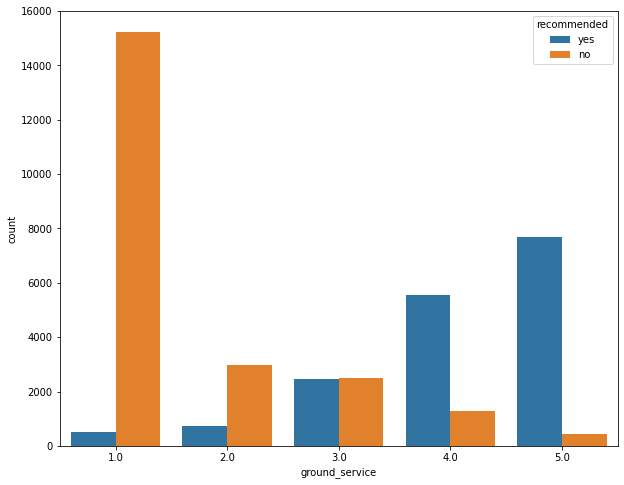

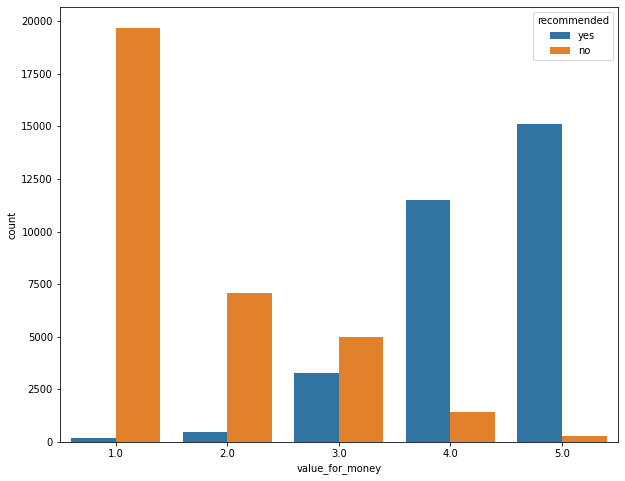

In [ ]:
# Distribution for overall rating

lis=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']
for i in lis:
  plt.figure(figsize=(10,8))
  fig=sns.countplot(df[i],hue=df['recommended'])
  
  


### 2. Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          64440 non-null  object        
 1   overall          62530 non-null  float64       
 2   author           64440 non-null  object        
 3   review_date      64440 non-null  datetime64[ns]
 4   customer_review  64440 non-null  object        
 5   aircraft         19717 non-null  object        
 6   traveller_type   39754 non-null  object        
 7   cabin            63302 non-null  object        
 8   route            39725 non-null  object        
 9   date_flown       39633 non-null  datetime64[ns]
 10  seat_comfort     60681 non-null  float64       
 11  cabin_service    60715 non-null  float64       
 12  food_bev         52608 non-null  float64       
 13  entertainment    44193 non-null  float64       
 14  ground_service   39358 non-null  float

In [ ]:
# dropping column 'route','author','review_date','date_flown','customer_review'.

df.drop(['route','author','review_date','date_flown','Verified_review','review_year','aircraft','customer_review'],axis=1,inplace=True)

2.1. Distribution plots

In [ ]:
# Checking for imbalance in dependent variable ("recommended")
no,yes=df['recommended'].value_counts()
percent_neg_class=no/(no+yes)*100
percent_pos_class=100-percent_neg_class
print(f'The percentage of positive and negative class are {percent_pos_class} and {percent_neg_class} respectively')

The percentage of positive and negative class are 47.40223463687151 and 52.59776536312849 respectively


***Since positive class and negative class percent are nearly equal, therefore there is no class imbalance for dependent variable.*** 

---



---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

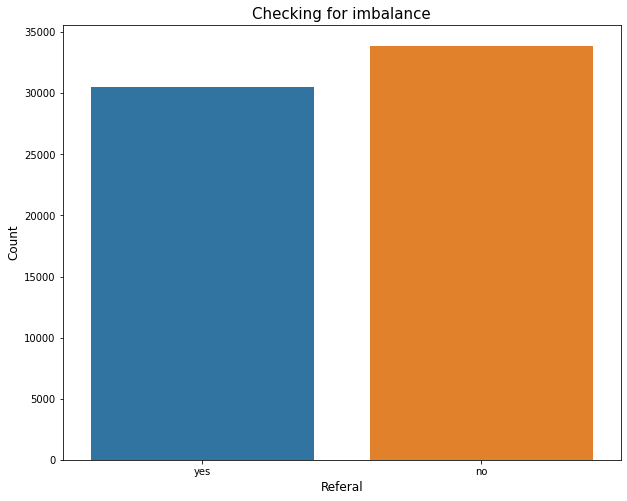

In [ ]:
# Visualization for Class Imbalance in dependent variable

plt.figure(figsize=(10,8))
sns.countplot(df['recommended'])
plt.title('Checking for imbalance',fontsize=15)
plt.xlabel('Referal',fontsize=12)
plt.ylabel('Count',fontsize=12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


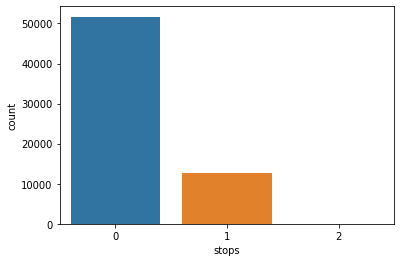

In [ ]:
sns.countplot(df['stops'])

## Missing Value for Traveller_type

First we will predict the missing value of traveller_type column.In order to predict the missing values of traveller_type we first impute randomn sample for the NaN value in the rest columns.

In [ ]:
df_trial=df.copy()

In [ ]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          64440 non-null  object 
 1   overall          62530 non-null  float64
 2   traveller_type   39754 non-null  object 
 3   cabin            63302 non-null  object 
 4   seat_comfort     60681 non-null  float64
 5   cabin_service    60715 non-null  float64
 6   food_bev         52608 non-null  float64
 7   entertainment    44193 non-null  float64
 8   ground_service   39358 non-null  float64
 9   value_for_money  63975 non-null  float64
 10  recommended      64440 non-null  object 
 11  stops            64440 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 5.9+ MB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

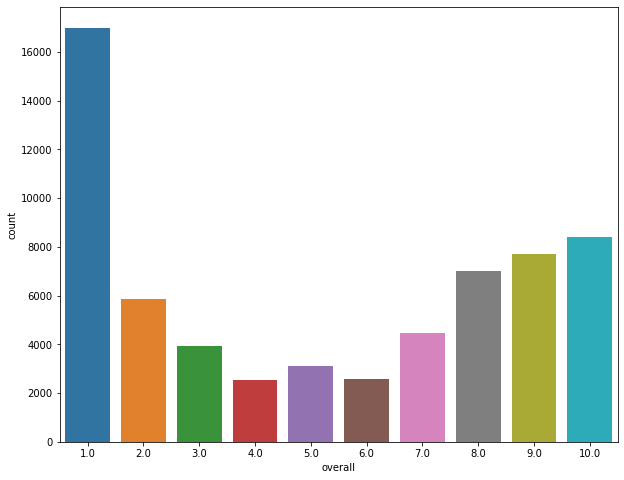

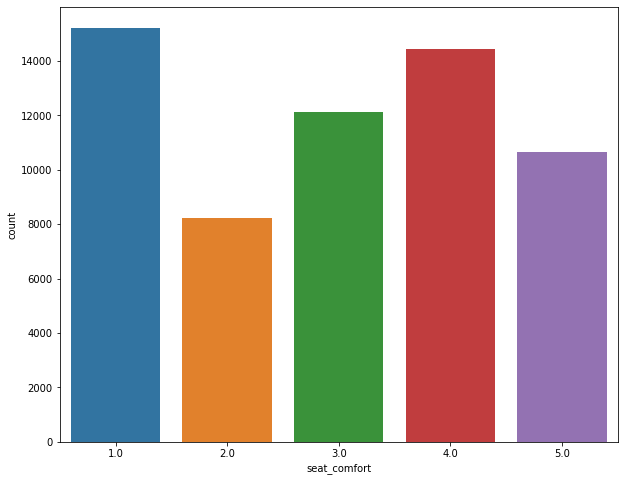

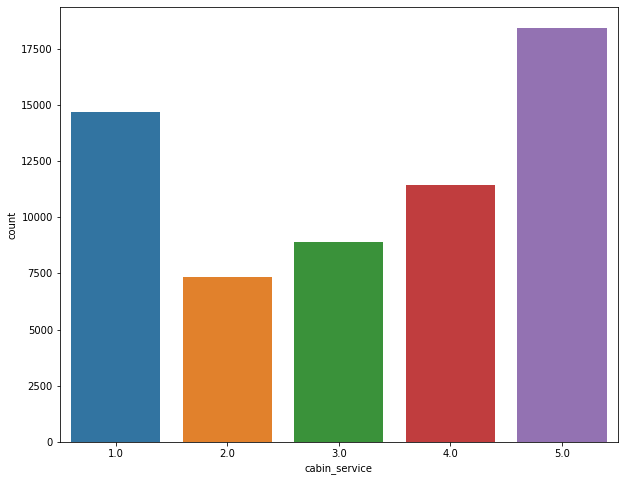

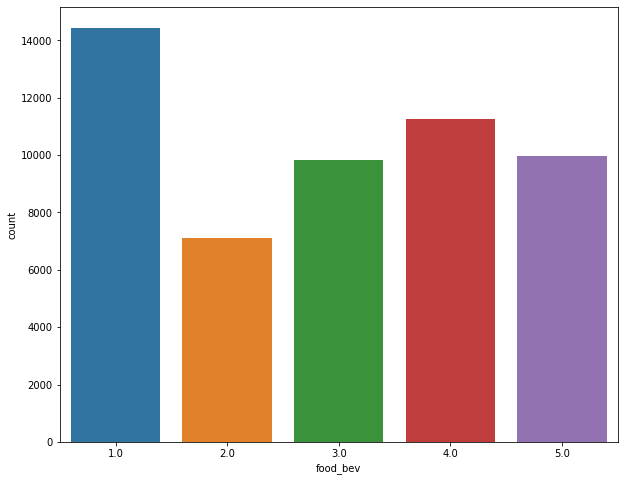

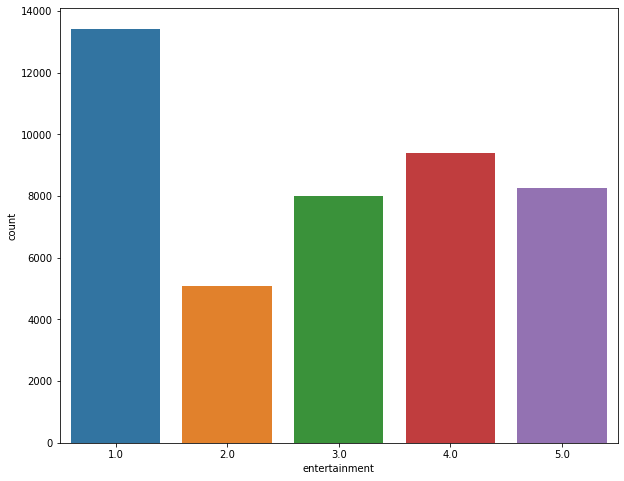

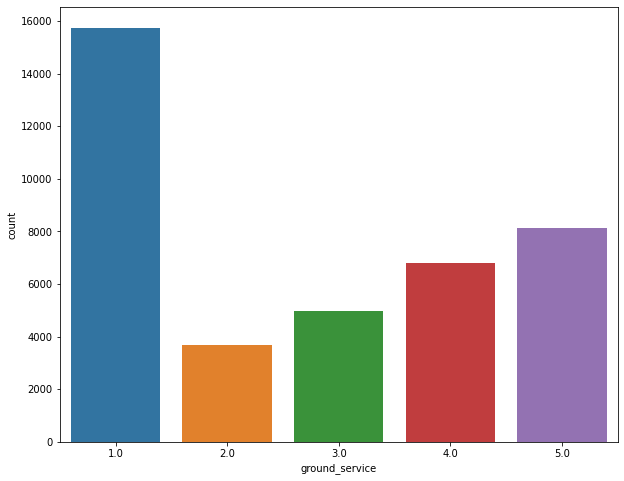

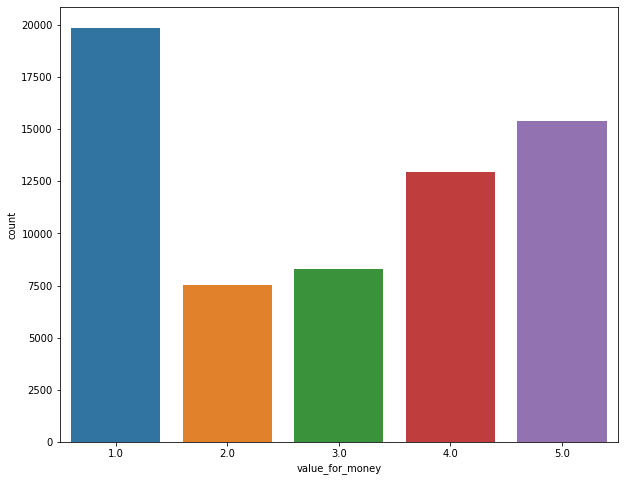

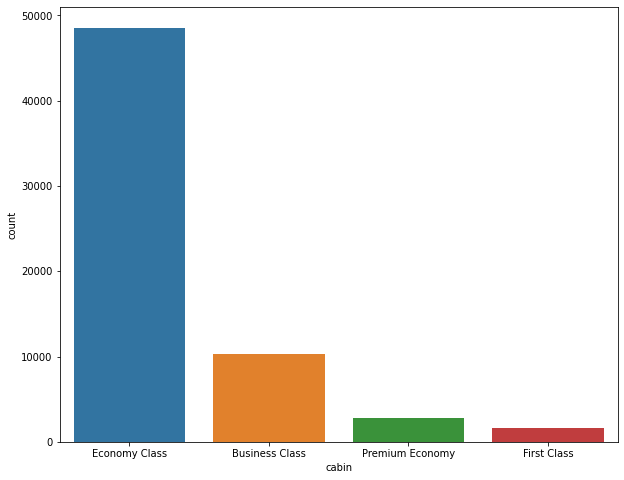

In [ ]:
lis=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money','cabin']
for i in lis:
  plt.figure(figsize=(10,8))
  fig=sns.countplot(df_trial[i])

In [ ]:
from sklearn_pandas import CategoricalImputer

In [ ]:
list_=['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money','cabin']
for i in list_:
  imputer = CategoricalImputer()
  imputer.fit_transform(df_trial[i])
  df_trial[i]=imputer.transform(df_trial[i])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

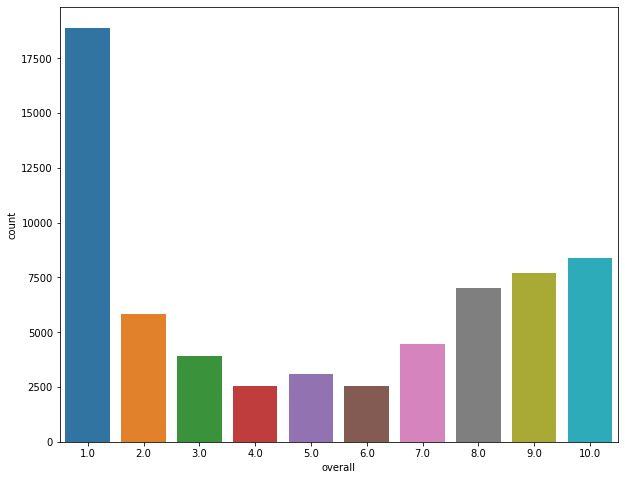

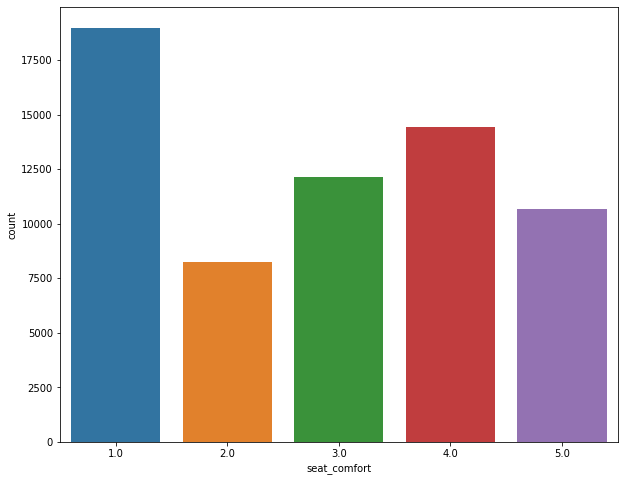

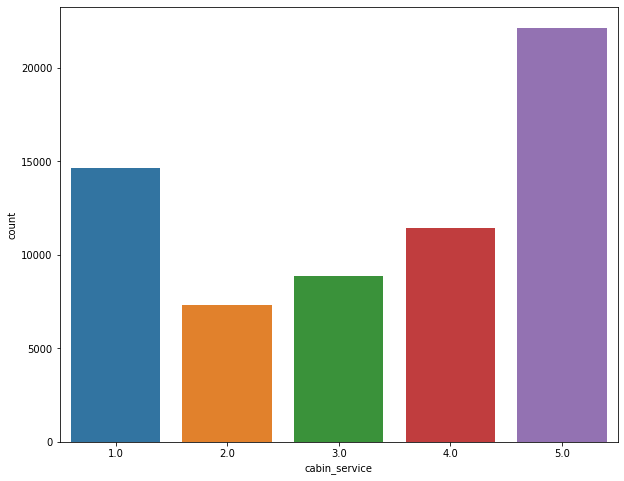

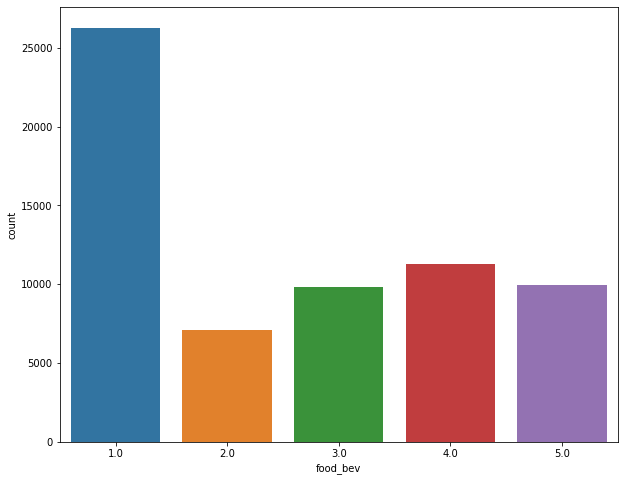

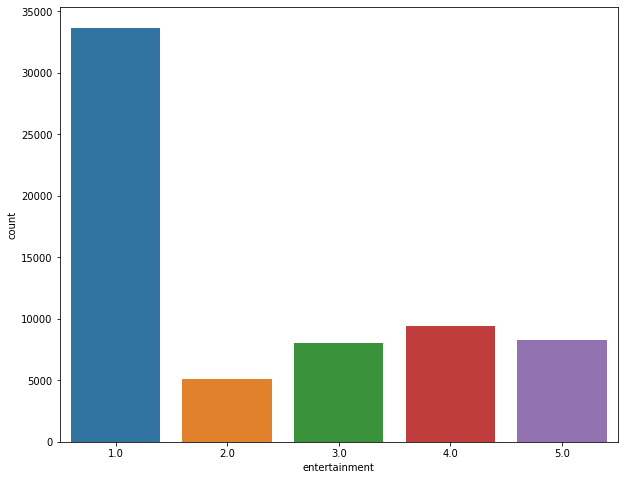

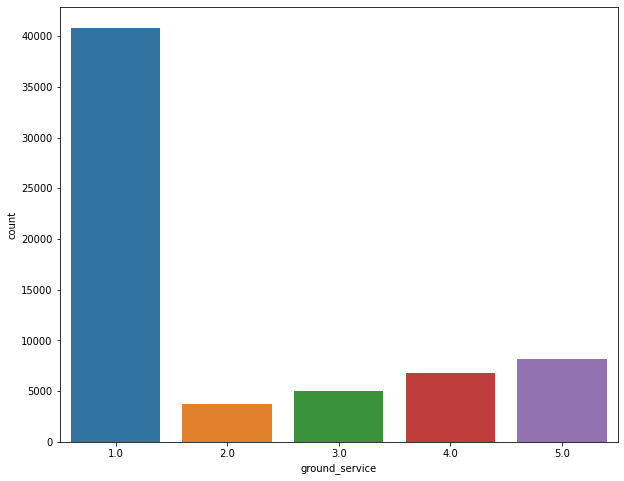

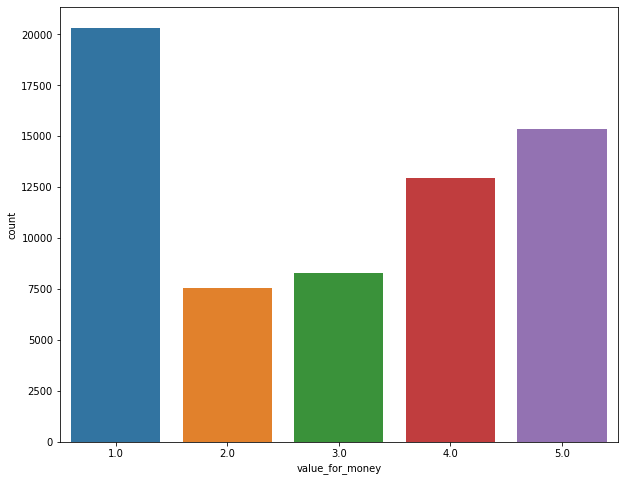

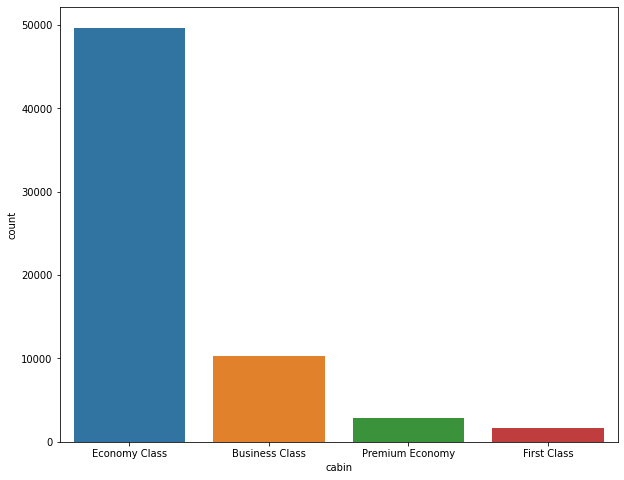

In [ ]:
for i in list_:
  plt.figure(figsize=(10,8))
  sns.countplot(df_trial[i])

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 842 kB/s 


In [ ]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          64440 non-null  object 
 1   overall          64440 non-null  float64
 2   traveller_type   39754 non-null  object 
 3   cabin            64440 non-null  object 
 4   seat_comfort     64440 non-null  float64
 5   cabin_service    64440 non-null  float64
 6   food_bev         64440 non-null  float64
 7   entertainment    64440 non-null  float64
 8   ground_service   64440 non-null  float64
 9   value_for_money  64440 non-null  float64
 10  recommended      64440 non-null  object 
 11  stops            64440 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 5.9+ MB


In [ ]:
x_trial=df_trial[df_trial.traveller_type.isna()==False].drop('traveller_type',axis=1)
y_trial=df_trial[df_trial.traveller_type.isna()==False].traveller_type
x_test_miss=df_trial[df_trial.traveller_type.isna()==True].drop('traveller_type',axis=1)

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Transformation of categorical variable
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
col_transform=ColumnTransformer(transformers=[('op1',BinaryEncoder(),['airline']),
                                              ('op2',OrdinalEncoder( categories=[['Economy Class', 'Business Class', 'Premium Economy','First Class']]),['cabin']),
                                              ('op3',OneHotEncoder(drop='first'),['recommended'])],remainder='passthrough')

In [ ]:
col_transform.fit(x_trial)

ColumnTransformer(remainder='passthrough',
                  transformers=[('op1', BinaryEncoder(), ['airline']),
                                ('op2',
                                 OrdinalEncoder(categories=[['Economy Class',
                                                             'Business Class',
                                                             'Premium Economy',
                                                             'First Class']]),
                                 ['cabin']),
                                ('op3', OneHotEncoder(drop='first'),
                                 ['recommended'])])

In [ ]:
x_trial_1=col_transform.transform(x_trial)

In [ ]:
dep_col=LabelEncoder()
dep_col.fit(y_trial)

LabelEncoder()

In [ ]:
y_trial_1=dep_col.transform(y_trial)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0)
clf_DT.fit(x_trial_1,y_trial_1)
clf_DT.score(x_trial_1,y_trial_1)

0.8261055491271319

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc=RandomForestClassifier()
clf_rfc.fit(x_trial_1,y_trial_1)

RandomForestClassifier()

In [ ]:
clf_rfc.score(x_trial_1,y_trial_1)

0.8261055491271319

In [ ]:
y_trial_predict=clf_rfc.predict(x_trial_1)

In [ ]:
y_trial_predict.dtype

dtype('int64')

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,plot_roc_curve
accuracy_score(y_trial_1,y_trial_predict)


0.8261055491271319

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_trial_1,y_trial_1)

KNeighborsClassifier()

In [ ]:
clf_knn.score(x_trial_1,y_trial_1)

0.5246264526840066

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbr = GradientBoostingClassifier(n_estimators=40,learning_rate=0.01,max_depth=21,random_state=0)
clf_gbr.fit(x_trial_1,y_trial_1)
clf_gbr.score(x_trial_1,y_trial_1)

0.8031896161392564

In [ ]:
from sklearn.naive_bayes import CategoricalNB,GaussianNB 
clf_cnb = CategoricalNB(alpha=0.001)
clf_cnb.fit(x_trial_1, y_trial_1)

CategoricalNB(alpha=0.001)

In [ ]:
clf_cnb.score(x_trial_1, y_trial_1)

0.350857775318207

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(x_trial_1, y_trial_1)
clf_gnb.score(x_trial_1, y_trial_1)

0.34499672988881624

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf_abc=AdaBoostClassifier(random_state=0)
clf_abc.fit(x_trial_1,y_trial_1)
clf_abc.score(x_trial_1,y_trial_1)

0.3877345675906827

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf_etc = ExtraTreesClassifier()
clf_etc.fit(x_trial_1,y_trial_1)
clf_etc.score(x_trial_1,y_trial_1)

0.8261055491271319

In [ ]:
x_test_miss_1=col_transform.transform(x_test_miss)
y_predict=clf_etc.predict(x_test_miss_1)

In [ ]:
miss=dep_col.inverse_transform(y_predict)

In [ ]:
#Imputing missing value in the traveller_type column which are predicted by extratree classifier
j=0
for i in df[df['traveller_type'].isna()==True].index:
  df['traveller_type'][i]=miss[j]
  j+=1
  

<ipython-input-59-686f5999c755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traveller_type'][i]=miss[j]


In [ ]:
df_trial.traveller_type[1004]=miss[4]

<ipython-input-60-cb7859598257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trial.traveller_type[1004]=miss[4]


Predicting missing value in the ground service column

In [ ]:
df_trial_2=df.copy()

In [ ]:
df.ground_service.isna().value_counts()

False    39358
True     25082
Name: ground_service, dtype: int64

In [ ]:
# Imputing the missing value of 'overall','seat_comfort','cabin_service','food_bev','entertainment','value_for_money','cabin'
list_=['overall','seat_comfort','cabin_service','food_bev','entertainment','value_for_money','cabin']
for i in list_:
  imputer = CategoricalImputer()
  imputer.fit_transform(df_trial_2[i])
  df_trial_2[i]=imputer.transform(df_trial_2[i])

In [ ]:
# train test split
x_trial=df_trial_2[df_trial_2.ground_service.isna()==False].drop('ground_service',axis=1)
y_trial=df_trial_2[df_trial_2.ground_service.isna()==False].ground_service
x_test_miss=df_trial_2[df_trial_2.ground_service.isna()==True].drop('ground_service',axis=1)

In [ ]:
x_test_miss

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,value_for_money,recommended,stops
317,Turkish Airlines,1.0,Business,Economy Class,1.0,5.0,1.0,1.0,1.0,no,1
359,Turkish Airlines,1.0,Business,Economy Class,1.0,5.0,1.0,1.0,1.0,no,0
380,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,1
513,Turkish Airlines,1.0,Family Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,0
736,Turkish Airlines,1.0,Family Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...
64435,Ukraine International,1.0,Family Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,0
64436,Ukraine International,1.0,Family Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,0
64437,Ukraine International,1.0,Family Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,0
64438,Ukraine International,1.0,Family Leisure,Economy Class,1.0,5.0,1.0,1.0,1.0,no,0


In [ ]:
# Transformation of categorical variable
col_transform_1=ColumnTransformer(transformers=[('op1',BinaryEncoder(),['airline']),
                                              ('op2',OrdinalEncoder( categories=[['Economy Class', 'Business Class', 'Premium Economy','First Class']]),['cabin']),
                                              ('op3',OneHotEncoder(drop='first'),['recommended','traveller_type'])],remainder='passthrough')

In [ ]:
col_transform_1.fit(x_trial)

ColumnTransformer(remainder='passthrough',
                  transformers=[('op1', BinaryEncoder(), ['airline']),
                                ('op2',
                                 OrdinalEncoder(categories=[['Economy Class',
                                                             'Business Class',
                                                             'Premium Economy',
                                                             'First Class']]),
                                 ['cabin']),
                                ('op3', OneHotEncoder(drop='first'),
                                 ['recommended', 'traveller_type'])])

In [ ]:
df_trial_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          64440 non-null  object 
 1   overall          64440 non-null  float64
 2   traveller_type   64440 non-null  object 
 3   cabin            64440 non-null  object 
 4   seat_comfort     64440 non-null  float64
 5   cabin_service    64440 non-null  float64
 6   food_bev         64440 non-null  float64
 7   entertainment    64440 non-null  float64
 8   ground_service   39358 non-null  float64
 9   value_for_money  64440 non-null  float64
 10  recommended      64440 non-null  object 
 11  stops            64440 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 5.9+ MB


In [ ]:
x_train_2=col_transform_1.transform(x_trial)
x_test_2=col_transform_1.transform(x_test_miss)

In [ ]:
clf_gbc=GradientBoostingClassifier()
clf_gbc.fit(x_train_2,y_trial)
clf_gbc.score(x_train_2,y_trial)

0.652192692718126

In [ ]:

clf_abc=AdaBoostClassifier()
clf_abc.fit(x_train_2,y_trial)
clf_abc.score(x_train_2,y_trial)

0.6391076782356827

In [ ]:
clf_knn=KNeighborsClassifier(n_neighbors=100,algorithm='brute',p=3)
clf_knn.fit(x_train_2,y_trial)
clf_knn.score(x_train_2,y_trial)

0.6443924996188831

In [ ]:
from sklearn.svm import SVC
clf_svc=SVC(kernel='rbf',C=1000,max_iter=50000)
clf_svc.fit(x_train_2,y_trial)
clf_svc.score(x_train_2,y_trial)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.4292901062045836

In [ ]:

miss_ground=clf_svc.predict(x_test_2)

In [ ]:
#Imputing missing value in the ground service column which are predicted by 
j=0
for i in df[df['ground_service'].isna()==True].index:
  df['ground_service'][i]=miss_ground[j]
  j+=1

<ipython-input-75-2d43286a8e1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_service'][i]=miss_ground[j]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          64440 non-null  object 
 1   overall          62530 non-null  float64
 2   traveller_type   64440 non-null  object 
 3   cabin            63302 non-null  object 
 4   seat_comfort     60681 non-null  float64
 5   cabin_service    60715 non-null  float64
 6   food_bev         52608 non-null  float64
 7   entertainment    44193 non-null  float64
 8   ground_service   64440 non-null  float64
 9   value_for_money  63975 non-null  float64
 10  recommended      64440 non-null  object 
 11  stops            64440 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 5.9+ MB


Imputing missing value of entertaiment

In [ ]:
df_trial_3=df.copy()

In [ ]:
# Imputing the missing value of 'overall','seat_comfort','cabin_service','food_bev','entertainment','value_for_money','cabin'
list_=['overall','seat_comfort','cabin_service','food_bev','value_for_money','cabin']
for i in list_:
  imputer = CategoricalImputer()
  imputer.fit_transform(df_trial_3[i])
  df_trial_3[i]=imputer.transform(df_trial_3[i])

In [ ]:
# train test split
x_trial=df_trial_3[df_trial_3.entertainment.isna()==False].drop('entertainment',axis=1)
y_trial=df_trial_3[df_trial_3.entertainment.isna()==False].entertainment
x_test_miss=df_trial_3[df_trial_3.entertainment.isna()==True].drop('entertainment',axis=1)

In [ ]:
# Transformation of categorical variable
col_transform_3=ColumnTransformer(transformers=[('op1',BinaryEncoder(),['airline']),
                                              ('op2',OrdinalEncoder( categories=[['Economy Class', 'Business Class', 'Premium Economy','First Class']]),['cabin']),
                                              ('op3',OneHotEncoder(drop='first'),['recommended','traveller_type'])],remainder='passthrough')

In [ ]:
col_transform_3.fit(x_trial)

ColumnTransformer(remainder='passthrough',
                  transformers=[('op1', BinaryEncoder(), ['airline']),
                                ('op2',
                                 OrdinalEncoder(categories=[['Economy Class',
                                                             'Business Class',
                                                             'Premium Economy',
                                                             'First Class']]),
                                 ['cabin']),
                                ('op3', OneHotEncoder(drop='first'),
                                 ['recommended', 'traveller_type'])])

In [ ]:
x_train_3=col_transform_3.transform(x_trial)
x_test_3=col_transform_3.transform(x_test_miss)


In [ ]:
clf_gbc=GradientBoostingClassifier()
clf_gbc.fit(x_train_3,y_trial)
clf_gbc.score(x_train_3,y_trial)

0.5480958522842985

In [ ]:

clf_abc=AdaBoostClassifier()
clf_abc.fit(x_train_3,y_trial)
clf_abc.score(x_train_3,y_trial)

0.5196524336433371

In [ ]:
clf_knn=KNeighborsClassifier(n_neighbors=100,algorithm='brute')
clf_knn.fit(x_train_3,y_trial)
clf_knn.score(x_train_3,y_trial)

0.5474848957979771

In [ ]:
from sklearn.svm import SVC
clf_svc=SVC(kernel='rbf',C=1000,max_iter=50000)
clf_svc.fit(x_train_3,y_trial)
clf_svc.score(x_train_3,y_trial)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.2285656099382255

In [ ]:
miss_entertainment=clf_svc.predict(x_test_3)

In [ ]:
#Imputing missing value in the entertianment column which are predicted by 
j=0
for i in df[df['entertainment'].isna()==True].index:
  df['entertainment'][i]=miss_entertainment[j]
  j+=1

<ipython-input-88-7f8b54eec322>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entertainment'][i]=miss_entertainment[j]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64440 entries, 0 to 64439
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          64440 non-null  object 
 1   overall          62530 non-null  float64
 2   traveller_type   64440 non-null  object 
 3   cabin            63302 non-null  object 
 4   seat_comfort     60681 non-null  float64
 5   cabin_service    60715 non-null  float64
 6   food_bev         52608 non-null  float64
 7   entertainment    64440 non-null  float64
 8   ground_service   64440 non-null  float64
 9   value_for_money  63975 non-null  float64
 10  recommended      64440 non-null  object 
 11  stops            64440 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 5.9+ MB


Imputing missing value for remaining column with category_imputer

In [ ]:
list_=['overall','seat_comfort','cabin_service','food_bev','value_for_money','cabin']
for i in list_:
  imputer = CategoricalImputer()
  imputer.fit_transform(df[i])
  df[i]=imputer.transform(df[i])

# Model evaluation

In [ ]:
# x,y variable
x=df.drop('recommended',axis=1)
y=df.recommended

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,stops
22236,British Airways,1.0,Business,Economy Class,2.0,2.0,1.0,2.0,1.0,1.0,0
49924,Air China,7.0,Solo Leisure,Economy Class,3.0,4.0,3.0,4.0,1.0,5.0,0
59192,Frontier Airlines,4.0,Business,Economy Class,4.0,3.0,1.0,1.0,2.0,2.0,0
30009,easyJet,8.0,Family Leisure,Economy Class,4.0,5.0,4.0,5.0,4.0,5.0,0
19672,Alitalia,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,1.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
45891,Air China,2.0,Solo Leisure,Economy Class,2.0,1.0,1.0,2.0,1.0,3.0,0
52416,Spirit Airlines,1.0,Solo Leisure,Economy Class,1.0,5.0,1.0,1.0,2.0,1.0,0
42613,Thai Airways,8.0,Family Leisure,Economy Class,5.0,3.0,4.0,4.0,4.0,4.0,0
43567,Air India,2.0,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,1.0,3.0,0


In [ ]:
# Transformation of categorical variable
column_trans=ColumnTransformer(transformers=[('op1',BinaryEncoder(),['airline']),
                                            ('op2',OneHotEncoder(drop='first'),['traveller_type']),
                                            ('op3',OrdinalEncoder( categories=[['Economy Class','Premium Economy', 'Business Class','First Class']]),['cabin']),],remainder='passthrough')

In [ ]:
column_trans.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('op1', BinaryEncoder(), ['airline']),
                                ('op2', OneHotEncoder(drop='first'),
                                 ['traveller_type']),
                                ('op3',
                                 OrdinalEncoder(categories=[['Economy Class',
                                                             'Premium Economy',
                                                             'Business Class',
                                                             'First Class']]),
                                 ['cabin'])])

In [ ]:
x_train

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,stops
22236,British Airways,1.0,Business,Economy Class,2.0,2.0,1.0,2.0,1.0,1.0,0
49924,Air China,7.0,Solo Leisure,Economy Class,3.0,4.0,3.0,4.0,1.0,5.0,0
59192,Frontier Airlines,4.0,Business,Economy Class,4.0,3.0,1.0,1.0,2.0,2.0,0
30009,easyJet,8.0,Family Leisure,Economy Class,4.0,5.0,4.0,5.0,4.0,5.0,0
19672,Alitalia,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,1.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
45891,Air China,2.0,Solo Leisure,Economy Class,2.0,1.0,1.0,2.0,1.0,3.0,0
52416,Spirit Airlines,1.0,Solo Leisure,Economy Class,1.0,5.0,1.0,1.0,2.0,1.0,0
42613,Thai Airways,8.0,Family Leisure,Economy Class,5.0,3.0,4.0,4.0,4.0,4.0,0
43567,Air India,2.0,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,1.0,3.0,0


In [ ]:
# Transforming training columns
x_train_trans=pd.DataFrame(column_trans.transform(x_train))
x_test_trans=pd.DataFrame(column_trans.transform(x_test))

In [ ]:
x_train_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,3.0,4.0,3.0,4.0,1.0,5.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,1.0,1.0,2.0,2.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,4.0,5.0,4.0,5.0,4.0,5.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,10.0,4.0,5.0,5.0,1.0,5.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45103,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,0.0
45104,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,0.0
45105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,5.0,3.0,4.0,4.0,4.0,4.0,0.0
45106,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,3.0,0.0


In [ ]:
# Columns name for transform data
list_=['airline0','airline_1','airline_2','airline_3','airline_4','airline_5','airline_6','traveller_type1','traveller_type2','traveller_type3','Class',
       'overall','seat_comfort','cabin_service', 'food_bev', 'entertainment', 'ground_service','value_for_money','stops']
x_train_trans.columns=list_
x_test_trans.columns=list_

In [ ]:
# Transforming dependent variable using LabelEncoder 
dependent=LabelEncoder()
dependent.fit(y_train)
y_train_trans=dependent.transform(y_train)
y_test_trans=dependent.transform(y_test)

In [ ]:
# Decision Tree classifier
clf_decision=DecisionTreeClassifier(max_depth=10,min_samples_split=100,min_samples_leaf=50)
clf_decision.fit(x_train_trans,y_train_trans)
clf_decision.score(x_train_trans,y_train_trans)

0.96040613638379

In [ ]:
y_test_predict=clf_decision.predict(x_test_trans)

In [ ]:
accuracy_score(y_test_trans,y_test_predict)

0.957376370784192

In [ ]:
# Gradient Boosting classifier
clf_gradient=GradientBoostingClassifier(n_estimators=100)
clf_gradient.fit(x_train_trans,y_train_trans)
clf_gradient.score(x_train_trans,y_train_trans)

0.960716502615944

In [ ]:
y_test_predict=clf_gradient.predict(x_test_trans)

In [ ]:
accuracy_score(y_test_trans,y_test_predict)

0.9594972067039106

In [ ]:
# ExtraTree classifier
clf_etc=ExtraTreesClassifier(n_estimators=100)
clf_etc.fit(x_train_trans,y_train_trans)
clf_etc.score(x_train_trans,y_train_trans)

0.9990467322869557

In [ ]:
y_test_predict=clf_etc.predict(x_test_trans)
accuracy_score(y_test_trans,y_test_predict)

0.9635836954272708

In [ ]:
clf_knn=KNeighborsClassifier(n_neighbors=100)
clf_knn.fit(x_train_trans,y_train_trans)
clf_knn.score(x_train_trans,y_train_trans)

0.9590094883390973

0.957583281605628
0.9573382308027618


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


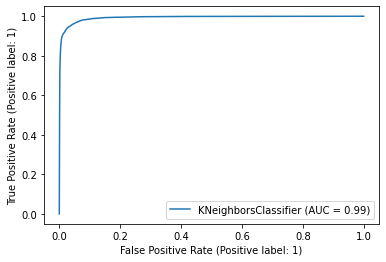

In [ ]:
y_test_predict=clf_knn.predict(x_test_trans)
print(accuracy_score(y_test_trans,y_test_predict))
print(roc_auc_score(y_test_trans,y_test_predict))
plot_roc_curve(clf_knn,x_test_trans,y_test_trans)

In [ ]:
clf_svc=SVC(kernel='rbf',C=1000,max_iter=50000)
clf_svc.fit(x_train_trans,y_train_trans)
clf_svc.score(x_train_trans,y_train_trans)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9391017114480802

0.9292364990689013
0.9295553365897757
[[9383  779]
 [ 589 8581]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


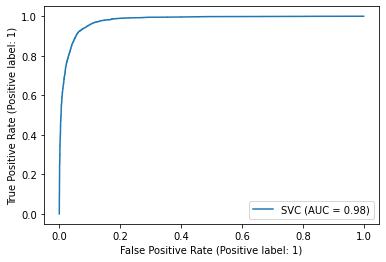

In [ ]:
y_test_predict=clf_svc.predict(x_test_trans)
print(accuracy_score(y_test_trans,y_test_predict))
print(roc_auc_score(y_test_trans,y_test_predict))
print(confusion_matrix(y_test_trans,y_test_predict))
plot_roc_curve(clf_svc,x_test_trans,y_test_trans)

2 randomized search cv


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[100,150,200,250],'gamma':[0.005,0.01,0.015],'max_iter':[50000]}
grid2=RandomizedSearchCV(SVC(),params,random_state=0,verbose=3,cv=2)
grid2.fit(x_train_trans,y_train_trans)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=200, gamma=0.01, kernel=poly, max_iter=50000;, score=0.957 total time=  12.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=200, gamma=0.01, kernel=poly, max_iter=50000;, score=0.960 total time=  13.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=100, gamma=0.01, kernel=linear, max_iter=50000;, score=0.512 total time=  17.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=100, gamma=0.01, kernel=linear, max_iter=50000;, score=0.078 total time=  17.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=200, gamma=0.005, kernel=rbf, max_iter=50000;, score=0.958 total time=  13.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=200, gamma=0.005, kernel=rbf, max_iter=50000;, score=0.961 total time=  13.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=200, gamma=0.01, kernel=rbf, max_iter=50000;, score=0.958 total time=  15.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=200, gamma=0.01, kernel=rbf, max_iter=50000;, score=0.961 total time=  17.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=200, gamma=0.015, kernel=linear, max_iter=50000;, score=0.078 total time=  17.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=200, gamma=0.015, kernel=linear, max_iter=50000;, score=0.526 total time=  16.9s
[CV 1/2] END C=250, gamma=0.005, kernel=poly, max_iter=50000;, score=0.957 total time=   6.1s
[CV 2/2] END C=250, gamma=0.005, kernel=poly, max_iter=50000;, score=0.960 total time=   6.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=200, gamma=0.015, kernel=rbf, max_iter=50000;, score=0.956 total time=  17.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=200, gamma=0.015, kernel=rbf, max_iter=50000;, score=0.960 total time=  19.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=250, gamma=0.01, kernel=linear, max_iter=50000;, score=0.661 total time=  17.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=250, gamma=0.01, kernel=linear, max_iter=50000;, score=0.321 total time=  16.9s
[CV 1/2] END C=100, gamma=0.01, kernel=sigmoid, max_iter=50000;, score=0.564 total time=  35.7s
[CV 2/2] END C=100, gamma=0.01, kernel=sigmoid, max_iter=50000;, score=0.567 total time=  37.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/2] END C=100, gamma=0.015, kernel=rbf, max_iter=50000;, score=0.957 total time=  14.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/2] END C=100, gamma=0.015, kernel=rbf, max_iter=50000;, score=0.961 total time=  15.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [100, 150, 200, 250],
                                        'gamma': [0.005, 0.01, 0.015],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'max_iter': [50000]},
                   random_state=0, verbose=3)

In [ ]:
pd.DataFrame(grid2.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,11.416051,0.509498,1.740615,0.059365,50000,poly,0.01,200,"{'max_iter': 50000, 'kernel': 'poly', 'gamma':...",0.957435,0.960096,0.958766,0.001330,4
1,14.083941,0.025458,3.227674,0.014158,50000,linear,0.01,100,"{'max_iter': 50000, 'kernel': 'linear', 'gamma...",0.511617,0.078301,0.294959,0.216658,10
2,9.867854,0.118728,3.885093,0.127671,50000,rbf,0.005,200,"{'max_iter': 50000, 'kernel': 'rbf', 'gamma': ...",0.957835,0.960761,0.959298,0.001463,1
3,12.350212,0.535087,4.001579,0.124589,50000,rbf,0.01,200,"{'max_iter': 50000, 'kernel': 'rbf', 'gamma': ...",0.957569,0.960938,0.959253,0.001685,2
4,13.903200,0.135139,3.188237,0.007944,50000,linear,0.015,200,"{'max_iter': 50000, 'kernel': 'linear', 'gamma...",0.077592,0.525805,0.301698,0.224107,9


In [ ]:
grid2.best_params_

{'max_iter': 50000, 'kernel': 'rbf', 'gamma': 0.005, 'C': 200}

In [ ]:

clf_svc_opt=SVC(kernel= 'poly', gamma= 0.001, C=250,max_iter=50000,random_state=0)
clf_svc_opt.fit(x_train_trans,y_train_trans)
clf_svc_opt.score(x_train_trans,y_train_trans)


0.9587434601401081

In [ ]:
from mlxtend.plotting import plot_decision_regions


In [ ]:
y_test_pred=clf_svc_opt.predict(x_test_trans)

0.9292364990689013
0.9295553365897757


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


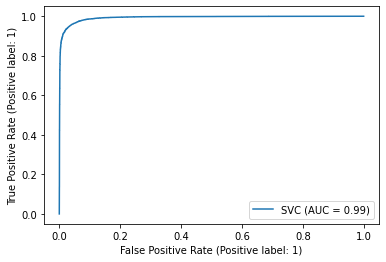

In [ ]:
print(accuracy_score(y_test_trans,y_test_predict))
print(roc_auc_score(y_test_trans,y_test_predict))
plot_roc_curve(clf_svc_opt,x_test_trans,y_test_trans)


In [ ]:
clf_gb=GaussianNB()
clf_gb.fit(x_train_trans,y_train_trans)
clf_gb.score(x_train_trans,y_train_trans)

0.9525583045136118

0.9540140699358577
0.9542253336730141


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


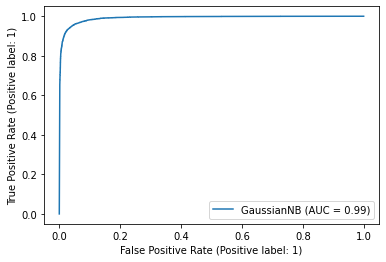

In [ ]:
y_test_predict=clf_gb.predict(x_test_trans)
print(accuracy_score(y_test_trans,y_test_predict))
print(roc_auc_score(y_test_trans,y_test_predict))
plot_roc_curve(clf_gb,x_test_trans,y_test_trans)

In [ ]:
clf_cb=CategoricalNB()
clf_cb.fit(x_train_trans,y_train_trans)
clf_cb.score(x_train_trans,y_train_trans)


0.9510951494191717

0.9527208773018829
0.9526439617133731


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


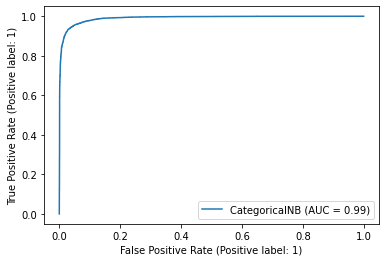

In [ ]:
y_test_predict=clf_cb.predict(x_test_trans)
print(accuracy_score(y_test_trans,y_test_predict))
print(roc_auc_score(y_test_trans,y_test_predict))
plot_roc_curve(clf_cb,x_test_trans,y_test_trans)

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 8.1 MB/s 


Permutation explainer: 11it [01:10,  7.82s/it]


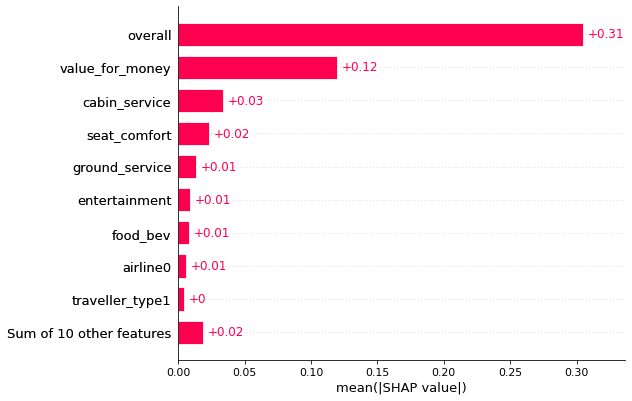

In [ ]:
import shap
explain=shap.Explainer(clf_svc_opt.predict,x_train_trans)
shap_values=explain(x_test_trans[:10])
shap.plots.bar(shap_values)

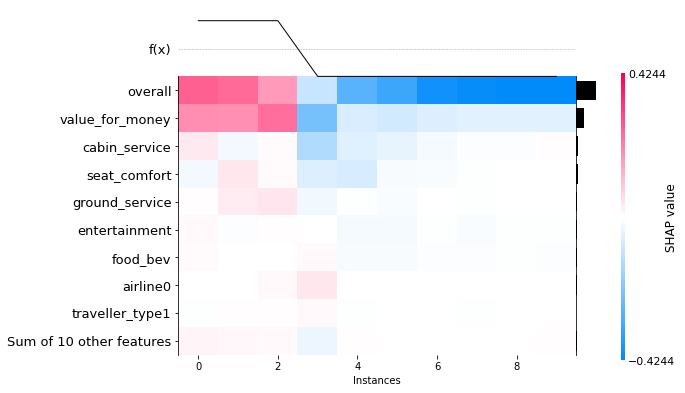

In [ ]:
shap.plots.heatmap(shap_values)

In [ ]:
shap.plots.voilin(shap_values)

AttributeError: ignored